# Import Libraries

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

import os

# Gathering Data
- manually download and upload `twitter-archive-enhanced.csv`
- programatically download `image_predictions.tsv` using requests library
- programatically collect `tweet_json.txt` using tweepy API

## Read `twitter-archive-enhanced.csv`

In [2]:
df_tw = pd.read_csv("./twitter-archive-enhanced.csv")
df_tw.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Download Programatically and Read `image_predictions.tsv` 

In [3]:
if os.path.isfile("./image_predictions.tsv"):
    print("Do not write file")
else:
    print("Do write file")
    r = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
    with open("./image_predictions.tsv",'w') as f:
        f.write(r.text)


Do not write file


In [4]:
df_img = pd.read_csv("./image_predictions.tsv", "\t")
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Get Json Data Using Tweeter API and Read `tweet_json.txt`

In [5]:
API_KEY = "REMOVED"
API_SECRET_KEY = "REMOVED"

ACCESS_TOKEN = "REMOVED"
ACCESS_TOKEN_SECRET = "REMOVED"

consumer_key = API_KEY
consumer_secret = API_SECRET_KEY
access_token = ACCESS_TOKEN
access_secret = ACCESS_TOKEN_SECRET

In [6]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [7]:
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [8]:
is_already_downloaded = True
if(not is_already_downloaded):
    #Download Tweepy status object based on Tweet ID and store in list
    list_of_tweets = []
    # Tweets that can't be found are saved in the list below:
    cant_find_tweets_for_those_ids = []
    for tweet_id in df_tw['tweet_id']:   
        try:
            list_of_tweets.append(api.get_status(tweet_id))
        except Exception as e:
            cant_find_tweets_for_those_ids.append(tweet_id)

In [9]:
if(not is_already_downloaded):
    #Printing 
    print("The list of tweets" ,len(list_of_tweets))
    print("The list of tweets no found" , len(cant_find_tweets_for_those_ids))

In [10]:
if(not is_already_downloaded):
    #Then in this code block we isolate the json part of each tweepy 
    #status object that we have downloaded and we add them all into a list
    my_list_of_dicts = []
    for each_json_tweet in list_of_tweets:
        my_list_of_dicts.append(each_json_tweet)

In [11]:
if(not is_already_downloaded):
    #we write this list into a txt file:
    with open('tweet_json.txt', 'w') as file:
            file.write(json.dumps(my_list_of_dicts, indent=4))

In [12]:
if(not is_already_downloaded):
    tweet_ids = df_tw['tweet_id'].values
    len(tweet_ids)

In [13]:
#identify information of interest from JSON dictionaries in txt file
#and put it in a dataframe called tweet JSON
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file: 
    
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        df_ex = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])



In [14]:
df_ex.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,34831,7312,9014803,17,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30173,5461,9014803,17,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22719,3603,9014803,17,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38083,7494,9014803,17,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36350,8054,9014803,17,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


# Assessing Data

## Exploratory Data Analysis
### What data and How many data are in `twitter-archive-enhanced.csv`, `image_prediction.tsv`, and `tweet_json.txt` files

In [15]:
print("data columns")
print(f"twitter-archive-enhanced.csv: {df_tw.columns}")
print(f"image_prediction.tsv: {df_img.columns}")
print(f"tweet_json.txt: {df_ex.columns}")

print("\ndata shape")
print(f"twitter-archive-enhanced.csv: {df_tw.shape}")
print(f"image_prediction.tsv: {df_img.shape}")
print(f"tweet_json.txt: {df_ex.shape}")

data columns
twitter-archive-enhanced.csv: Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')
image_prediction.tsv: Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')
tweet_json.txt: Index(['tweet_id', 'favorite_count', 'retweet_count', 'followers_count',
       'friends_count', 'source', 'retweeted_status', 'url'],
      dtype='object')

data shape
twitter-archive-enhanced.csv: (2356, 17)
image_prediction.tsv: (2075, 12)
tweet_json.txt: (2331, 8)


### `twitter-archive-enhanced.csv` file

In [16]:
df_tw.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [17]:
df_tw.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [18]:
df_tw.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
293,837820167694528512,NaN,NaN,2017-03-04 00:21:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Here's a pupper before and after being asked ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/837820167...,12,10,None,None,None,pupper,None
781,775729183532220416,NaN,NaN,2016-09-13 16:13:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This girl straight up rejected a guy because h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775729183...,13,10,None,None,None,None,None
1501,692142790915014657,6.920419e+17,4.196984e+09,2016-01-27 00:31:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These are some pictures of Teddy that further ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692142790...,13,10,None,None,None,None,None
713,784183165795655680,NaN,NaN,2016-10-07 00:06:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Reginald. He's one magical puppo. Aero...,NaN,NaN,NaN,https://vine.co/v/5ghHLBMMdlV,12,10,Reginald,None,None,None,puppo


In [19]:
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
df_tw.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### `image_prediction.tsv` file

In [21]:
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
df_img.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [23]:
df_img.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
109,667885044254572545,https://pbs.twimg.com/media/CUTN5V4XAAAIa4R.jpg,1,malamute,0.088530,True,golden_retriever,0.087499,True,muzzle,0.075008,False
41,666701168228331520,https://pbs.twimg.com/media/CUCZLHlUAAAeAig.jpg,1,Labrador_retriever,0.887707,True,Chihuahua,0.029307,True,French_bulldog,0.020756,True
1829,836001077879255040,https://pbs.twimg.com/media/C5oSiskU0AE8sJ_.jpg,4,Samoyed,0.963558,True,white_wolf,0.019848,False,malamute,0.005904,True
438,674422304705744896,https://pbs.twimg.com/media/CVwHgblWcAACWOD.jpg,1,golden_retriever,0.964497,True,Labrador_retriever,0.009006,True,tennis_ball,0.007139,False
1453,776819012571455488,https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg,3,Chihuahua,0.346545,True,dalmatian,0.166246,True,toy_terrier,0.117502,True


In [24]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
df_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### `tweet_json.txt` file

In [26]:
df_ex.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,34831,7312,9014803,17,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30173,5461,9014803,17,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22719,3603,9014803,17,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38083,7494,9014803,17,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36350,8054,9014803,17,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [27]:
df_ex.tail()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
2326,666049248165822465,92,38,9014832,17,Twitter for iPhone,Original tweet,https://t.co/4B7cOc1EDq
2327,666044226329800704,256,120,9014832,17,Twitter for iPhone,Original tweet,https://t.co/DWnyCjf2mx
2328,666033412701032449,105,39,9014832,17,Twitter for iPhone,Original tweet,https://t.co/y671yMhoiR
2329,666029285002620928,117,41,9014832,17,Twitter for iPhone,Original tweet,https://t.co/r7mOb2m0UI
2330,666020888022790149,2335,442,9014832,17,Twitter for iPhone,Original tweet,https://t.co/BLDqew2Ijj


In [28]:
df_ex.sample(5)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
663,788765914992902144,26771,10025,9014806,17,Twitter for iPhone,Original tweet,https://t.co/x5gXRS1abq
623,793226087023144960,9612,2808,9014806,17,Twitter for iPhone,Original tweet,https://t.co/K4dvelOMsM
114,869772420881756160,39031,8995,9014804,17,Twitter for iPhone,Original tweet,https://t.co/HciEaJkC4D
2227,667801013445750784,293,84,9014832,17,Twitter for iPhone,Original tweet,https://t.co/SVMF4Frf1w
404,822163064745328640,0,4573,9014806,17,Twitter for iPhone,This is a retweet,This is a retweet


In [29]:
df_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


In [30]:
df_ex.describe()

,favorite_count,retweet_count,followers_count,friends_count
count,2331.000000,2331.000000,2.331000e+03,2331.0
mean,7272.346632,2571.664093,9.014813e+06,17.0
std,11296.059276,4349.941209,3.911502e+01,0.0
min,0.000000,1.000000,9.014418e+06,17.0
25%,1259.000000,521.500000,9.014806e+06,17.0
50%,3150.000000,1198.000000,9.014818e+06,17.0
75%,8885.500000,2978.500000,9.014821e+06,17.0
max,149621.000000,73774.000000,9.014833e+06,17.0


## Quality Issues(required detect and document at least 8 issues)
1. `df_tw`: When manually check the data, `name`, `doggo`, `floofer`, `pupper` and `puppo` columns have None data. But programatically check using info function, then there are no null data.
1. `df_tw`: The'source' column refers to the device or location from which the Tweet was written (e.g. the Tweet was written to iPhone, Web, Deck or Vine).
1. `rating_denominator` have zero value
1. `in_reply_to_status_id` is float, but `id` columns must be intager.
1. `in_reply_to_user_id` is float, but `id` columns must be intager.
1. `p1`, `p2`, `p3`, kind of dogs name, have some duplicated name(lower case and first capitalized case)
1. `doggo`, `floofer`, `pupper`, and `puppo` columns in `df_tw` data frame chage to one-hot-encoded variable
1. In `df_tw`, `timestamp` and `retweeted_status_timestamp` columns datatype is object(string).
1. `name` column have some false name like `a`, `O`, `his`, and so on.


### When manually check the data, `name`, `doggo`, `floofer`, `pupper` and `puppo` columns have None data. But programatically check using info function, then there are no null data.

In [31]:
print(f"Check null data\n\
name: {df_tw[df_tw['name'].isna()].shape[0]}\n\
doggo: {df_tw[df_tw['doggo'].isna()].shape[0]}\n\
floofer: {df_tw[df_tw['floofer'].isna()].shape[0]}\n\
pupper: {df_tw[df_tw['pupper'].isna()].shape[0]}\n\
puppo: {df_tw[df_tw['puppo'].isna()].shape[0]}\n")
      
print(f"Check string is 'None' data\n\
name: {df_tw[df_tw['name'] == 'None'].shape[0]}\n\
doggo: {df_tw[df_tw['doggo'] == 'None'].shape[0]}\n\
floofer: {df_tw[df_tw['floofer'] == 'None'].shape[0]}\n\
pupper: {df_tw[df_tw['pupper'] == 'None'].shape[0]}\n\
puppo: {df_tw[df_tw['puppo'] == 'None'].shape[0]}\n")

Check null data
name: 0
doggo: 0
floofer: 0
pupper: 0
puppo: 0

Check string is 'None' data
name: 745
doggo: 2259
floofer: 2346
pupper: 2099
puppo: 2326



### The `source` column refers to the device or location from which the Tweet was written (e.g. the Tweet was written to iPhone, Web, Deck or Vine).

In [32]:
df_tw['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### `rating_denominator` have zero value

In [33]:
print(df_tw['rating_denominator'].describe())
df_tw[df_tw['rating_denominator'] == 0]

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


### `in_reply_to_status_id` is float, but `id` columns must be intager.

In [34]:
exist_id = df_tw['in_reply_to_status_id'].notnull()
df_tw.loc[exist_id, 'in_reply_to_status_id']

30      8.862664e+17
55      8.816070e+17
64      8.795538e+17
113     8.707262e+17
148     8.634256e+17
            ...     
2038    6.715449e+17
2149    6.693544e+17
2169    6.678065e+17
2189    6.689207e+17
2298    6.670655e+17
Name: in_reply_to_status_id, Length: 78, dtype: float64

### `in_reply_to_user_id` is float, but `id` columns must be intager.

In [35]:
exist_id = df_tw['in_reply_to_user_id'].notnull()
df_tw.loc[exist_id, 'in_reply_to_user_id']

30      2.281182e+09
55      4.738443e+07
64      3.105441e+09
113     1.648776e+07
148     7.759620e+07
            ...     
2038    4.196984e+09
2149    4.196984e+09
2169    4.196984e+09
2189    2.143566e+07
2298    4.196984e+09
Name: in_reply_to_user_id, Length: 78, dtype: float64

### `p1`, `p2`, `p3`, kind of dogs name, have some duplicated name(lower case and first capitalized case)

In [36]:
print(f"p1 dog names: {df_img['p1'].unique().shape}, lower: {df_img['p1'].str.lower().unique().shape}")
print(f"p2 dog names: {df_img['p2'].unique().shape}, lower: {df_img['p2'].str.lower().unique().shape}")
print(f"p3 dog names: {df_img['p3'].unique().shape}, lower: {df_img['p3'].str.lower().unique().shape}")

p1 dog names: (378,), lower: (378,)
p2 dog names: (405,), lower: (404,)
p3 dog names: (408,), lower: (408,)


### `doggo`, `floofer`, `pupper`, and `puppo` columns in `df_tw` data frame chage to one-hot-encoded variable

In [37]:
print(f"doggo value counts : \n{df_tw['doggo'].value_counts()}")
print("")
print(f"floofer value counts : \n{df_tw['floofer'].value_counts()}")
print("")
print(f"pupper value counts : \n{df_tw['pupper'].value_counts()}")
print("")
print(f"puppo value counts : \n{df_tw['puppo'].value_counts()}")

doggo value counts : 
None     2259
doggo      97
Name: doggo, dtype: int64

floofer value counts : 
None       2346
floofer      10
Name: floofer, dtype: int64

pupper value counts : 
None      2099
pupper     257
Name: pupper, dtype: int64

puppo value counts : 
None     2326
puppo      30
Name: puppo, dtype: int64


### In `df_tw`, `timestamp` and `retweeted_status_timestamp` columns datatype is object(string).

In [38]:
print(f"data type of timestamp column: {df_tw['timestamp'].dtype}")
print(f"data type of timestamp column: {df_tw['retweeted_status_timestamp'].dtype}")

data type of timestamp column: object
data type of timestamp column: object


### `name` column have some false name like `a`, `O`, `his`, and so on.
* list = {'a', 'O', 'his', 'getting', 'unacceptable', 'old', 'None', 'quite', 'not', 'mad', 'an', 'very', 'one', 'all', 'this', 'such', just', 'by', 'infuriating', 'light', 'life', 'my', 'the'}

In [39]:
df_tw['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

## Tidiness Issues(required detect and document at least 2 issues)
1. `tweet_id` is same column in `df_tw`, `df_img`, and `df_ex`, but `df_ex` is `object` type and others `int64`
1. All data must be merged
1. clean data by dropping duplicates row and not meaningful columns

### `tweet_id` is same column in `df_tw`, `df_img`, and `df_ex`, but `df_ex` is `object` type and others `int64`

In [40]:
df_tw['tweet_id'].dtype,\
df_img['tweet_id'].dtype,\
df_ex['tweet_id'].dtype

(dtype('int64'), dtype('int64'), dtype('O'))

### All data must be merged
### Clean data by dropping duplicates row and not meaningful columns

# Cleaning Data

## Setup cleaning value

In [41]:
df_tw_clean = df_tw.copy()
df_ex_clean = df_ex.copy()
df_img_clean = df_img.copy()

## Clean quality issues

### When manually check the data, `name`, `doggo`, `floofer`, `pupper` and `puppo` columns have None data. But programatically check using info function, then there are no null data.

In [42]:
# define: "None" data change to NaN value
# code
df_tw_clean.loc[df_tw['name'] == "None", 'name'] = None

df_tw_clean.loc[df_tw['doggo'] == "None", 'doggo'] = None
df_tw_clean.loc[df_tw['floofer'] == "None", 'floofer'] = None
df_tw_clean.loc[df_tw['pupper'] == "None", 'pupper'] = None
df_tw_clean.loc[df_tw['puppo'] == "None", 'puppo'] = None

# valid
print(
    df_tw['name'].isna().sum(),\
    df_tw['doggo'].isna().sum(),\
    df_tw['floofer'].isna().sum(),\
    df_tw['pupper'].isna().sum(),\
    df_tw['puppo'].isna().sum()
    )
print(
    df_tw_clean['name'].isna().sum(),\
    df_tw_clean['doggo'].isna().sum(),\
    df_tw_clean['floofer'].isna().sum(),\
    df_tw_clean['pupper'].isna().sum(),\
    df_tw_clean['puppo'].isna().sum()
    )

0 0 0 0 0
745 2259 2346 2099 2326


### The `source` column refers to the device or location from which the Tweet was written (e.g. the Tweet was written to iPhone, Web, Deck or Vine).

In [43]:
# define: source column change to simple
# code
idx = df_tw_clean['source'].str.find("Twitter for iPhone")
df_tw_clean.loc[idx > 0, 'source'] = "Twitter for iPhone"

idx = df_tw_clean['source'].str.find("Vine - Make a Scene")
df_tw_clean.loc[idx > 0, 'source'] = "Vine - Make a Scene"

idx = df_tw_clean['source'].str.find("Twitter Web Client")
df_tw_clean.loc[idx > 0, 'source'] = "Twitter Web Client"

idx = df_tw_clean['source'].str.find("TweetDeck")
df_tw_clean.loc[idx > 0, 'source'] = "TweetDeck"

# valid
print(df_tw['source'].value_counts())
print()
print(df_tw_clean['source'].value_counts())

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64


3. `df_tw`: `rating_denominator` have zero value
* define: `rating_denominator` value at least 1.
* code:

### `rating_denominator` have zero value

In [44]:
# define: rating_denominator value at least 1.
# code:
df_tw_clean.loc[df_tw_clean['rating_denominator'] == 0, 'rating_denominator'] = 1

# valid
df_tw_clean['rating_denominator'].describe()

count    2356.000000
mean       10.455857
std         6.744610
min         1.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

### `in_reply_to_user_id` is float, but id columns must be not float(it can be string or intager).

In [45]:
# define: `in_reply_to_user_id` change to intager value
# code:
df_tw_clean.loc[df_tw_clean['in_reply_to_user_id'].notnull(), 'in_reply_to_user_id'] = \
df_tw_clean.loc[df_tw_clean['in_reply_to_user_id'].notnull(), 'in_reply_to_user_id'].astype('int64').astype('str')

# valid
df_tw_clean.loc[df_tw_clean['in_reply_to_user_id'].notnull(), 'in_reply_to_user_id'].head()

30     2281181600
55       47384430
64     3105440746
113      16487760
148      77596200
Name: in_reply_to_user_id, dtype: object

### `in_reply_to_status_id` is float, but `id` columns must be not float(it can be string or intager).

In [46]:
# define: `in_reply_to_status_id` change to intager value
# code:
    
df_tw_clean.loc[df_tw_clean['in_reply_to_status_id'].notnull(), 'in_reply_to_status_id'] = \
df_tw_clean.loc[df_tw_clean['in_reply_to_status_id'].notnull(), 'in_reply_to_status_id'].astype('int64').astype('str')

# valid
df_tw_clean.loc[df_tw_clean['in_reply_to_status_id'].notnull(), 'in_reply_to_status_id'].head()

30     886266357075128320
55     881607037314052096
64     879553827334172672
113    870726202742493184
148    863425645568774144
Name: in_reply_to_status_id, dtype: object

### `p1`, `p2`, `p3`, kind of dogs name, have some duplicated name(lower case and first capitalized case)

In [47]:
# define: dog names change to lower case
# code:
df_img_clean['p1'] = df_img_clean['p1'].str.lower()
df_img_clean['p2'] = df_img_clean['p2'].str.lower()
df_img_clean['p3'] = df_img_clean['p3'].str.lower()

# valid
df_img_clean['p1'].unique(), df_img_clean['p2'].unique(), df_img_clean['p3'].unique()

(array(['welsh_springer_spaniel', 'redbone', 'german_shepherd',
        'rhodesian_ridgeback', 'miniature_pinscher',
        'bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
        'miniature_poodle', 'golden_retriever', 'gordon_setter',
        'walker_hound', 'pug', 'bloodhound', 'lhasa', 'english_setter',
        'hen', 'desktop_computer', 'italian_greyhound', 'maltese_dog',
        'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
        'soft-coated_wheaten_terrier', 'chihuahua',
        'black-and-tan_coonhound', 'coho', 'toy_terrier',
        'blenheim_spaniel', 'pembroke', 'llama',
        'chesapeake_bay_retriever', 'curly-coated_retriever', 'dalmatian',
        'ibizan_hound', 'border_collie', 'labrador_retriever', 'seat_belt',
        'snail', 'miniature_schnauzer', 'airedale', 'triceratops', 'swab',
        'hay', 'hyena', 'jigsaw_puzzle', 'west_highland_white_terrier',
        'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'rottweiler',
        'sib

### `doggo`, `floofer`, `pupper`, and `puppo` columns in `df_tw` data frame chage to one-hot-encoded variable

In [48]:
# define: Value in `doggo`, `floofer`, `pupper`, and `puppo` columns change from string to true or false
# code:
df_tw_clean['doggo'] = df_tw['doggo'] == 'doggo'
df_tw_clean['floofer'] = df_tw['floofer'] == 'floofer'
df_tw_clean['pupper'] = df_tw['pupper'] == 'pupper'
df_tw_clean['puppo'] = df_tw['puppo'] == 'puppo'

# valid
print("/***** before *****/")
print(f"doggo column\n{df_tw['doggo'].value_counts()},\n\n\
floofer column\n{df_tw['floofer'].value_counts()},\n\n\
pupper column\n{df_tw['pupper'].value_counts()},\n\n\
puppo column\n{df_tw['puppo'].value_counts()}")
print()
print("/***** after *****/")
print(f"doggo column\n{df_tw_clean['doggo'].value_counts()},\n\n\
floofer column\n{df_tw_clean['floofer'].value_counts()},\n\n\
pupper column\n{df_tw_clean['pupper'].value_counts()},\n\n\
puppo column\n{df_tw_clean['puppo'].value_counts()}")

/***** before *****/
doggo column
None     2259
doggo      97
Name: doggo, dtype: int64,

floofer column
None       2346
floofer      10
Name: floofer, dtype: int64,

pupper column
None      2099
pupper     257
Name: pupper, dtype: int64,

puppo column
None     2326
puppo      30
Name: puppo, dtype: int64

/***** after *****/
doggo column
False    2259
True       97
Name: doggo, dtype: int64,

floofer column
False    2346
True       10
Name: floofer, dtype: int64,

pupper column
False    2099
True      257
Name: pupper, dtype: int64,

puppo column
False    2326
True       30
Name: puppo, dtype: int64


### In `df_tw`, `timestamp` and `retweeted_status_timestamp` columns datatype is object(string).

In [49]:
# define: `datetime` columns change to seperated values
# code:
df_tw_clean['timestamp'] = pd.to_datetime(df_tw_clean['timestamp'])
df_tw_clean['retweeted_status_timestamp'] = pd.to_datetime(df_tw_clean['retweeted_status_timestamp'])

df_tw_clean['year'] = df_tw_clean['timestamp'].dt.year
df_tw_clean['month'] = df_tw_clean['timestamp'].dt.month
df_tw_clean['day'] = df_tw_clean['timestamp'].dt.day
df_tw_clean['hour'] = df_tw_clean['timestamp'].dt.hour
df_tw_clean['minute'] = df_tw_clean['timestamp'].dt.minute
df_tw_clean['second'] = df_tw_clean['timestamp'].dt.second

# valid
df_tw_clean[['timestamp', 'year', 'month', 'day', 'hour', 'minute', 'second']].sample(10)

,timestamp,year,month,day,hour,minute,second
1637,2016-01-05 02:09:54+00:00,2016,1,5,2,9,54
717,2016-10-05 15:47:27+00:00,2016,10,5,15,47,27
266,2017-03-15 02:10:39+00:00,2017,3,15,2,10,39
722,2016-10-03 23:25:55+00:00,2016,10,3,23,25,55
416,2017-01-21 01:02:48+00:00,2017,1,21,1,2,48
373,2017-02-05 22:55:23+00:00,2017,2,5,22,55,23
249,2017-03-24 16:10:40+00:00,2017,3,24,16,10,40
1664,2016-01-01 05:00:24+00:00,2016,1,1,5,0,24
332,2017-02-18 01:50:19+00:00,2017,2,18,1,50,19
764,2016-09-19 19:31:59+00:00,2016,9,19,19,31,59


### `name` column have some false name like `a`, `O`, `his`, and so on.

In [50]:
# define: false name change to `None` string
# code
false_name_list = [
    'a', 'O', 'his', 'getting', 'unacceptable', 'old', 'None', 
    'quite', 'not', 'mad', 'an', 'very', 'one', 'all', 'this', 
    'such', 'just', 'by', 'infuriating', 'light', 'life', 'my',
    'the']
df_tw_clean['name'] = df_tw_clean['name'].apply(lambda x: 'None' if x in false_name_list else x)

# valid
set(df_tw['name'].unique()).difference(set(df_tw_clean['name'].unique()))

{'O',
 'a',
 'all',
 'an',
 'by',
 'getting',
 'his',
 'infuriating',
 'just',
 'life',
 'light',
 'mad',
 'my',
 'not',
 'old',
 'one',
 'quite',
 'such',
 'the',
 'this',
 'unacceptable',
 'very'}

## Clean Tidiness Issues

### `tweet_id` is same column in `df_tw`, `df_img`, and `df_ex`, but `df_ex` is `object` type and others `int64`

In [51]:
# define: `tweet_id` in `df_ex` change to `int64` type
# code:
df_ex_clean['tweet_id'] = df_ex_clean['tweet_id'].astype('int64')

# valid
df_tw_clean['tweet_id'], df_img_clean['tweet_id'], df_ex_clean['tweet_id']

(0       892420643555336193
 1       892177421306343426
 2       891815181378084864
 3       891689557279858688
 4       891327558926688256
                ...        
 2351    666049248165822465
 2352    666044226329800704
 2353    666033412701032449
 2354    666029285002620928
 2355    666020888022790149
 Name: tweet_id, Length: 2356, dtype: int64,
 0       666020888022790149
 1       666029285002620928
 2       666033412701032449
 3       666044226329800704
 4       666049248165822465
                ...        
 2070    891327558926688256
 2071    891689557279858688
 2072    891815181378084864
 2073    892177421306343426
 2074    892420643555336193
 Name: tweet_id, Length: 2075, dtype: int64,
 0       892420643555336193
 1       892177421306343426
 2       891815181378084864
 3       891689557279858688
 4       891327558926688256
                ...        
 2326    666049248165822465
 2327    666044226329800704
 2328    666033412701032449
 2329    666029285002620928
 2330    66602

### All data must be merged

In [52]:
# define: all data frame merge
# code:
df = df_tw_clean.merge(df_img_clean, how = 'right', on = 'tweet_id')
df = df.merge(df_ex_clean, how = 'right', on = 'tweet_id')

# valid
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p3,p3_conf,p3_dog,favorite_count,retweet_count,followers_count,friends_count,source_y,retweeted_status,url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,banana,0.076110,False,34831,7312,9014803,17,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,papillon,0.068957,True,30173,5461,9014803,17,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,kelpie,0.031379,True,22719,3603,9014803,17,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,spatula,0.040836,False,38083,7494,9014803,17,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,german_short-haired_pointer,0.175219,True,36350,8054,9014803,17,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [53]:
df_cols = df.columns
df_each_cols = [df_tw_clean.columns, df_img_clean.columns, df_ex_clean.columns]

print(df_cols)
print(df_each_cols)
print(df.shape, df_tw_clean.shape, df_img_clean.shape, df_ex_clean.shape)

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source_x', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count',
       'followers_count', 'friends_count', 'source_y', 'retweeted_status',
       'url'],
      dtype='object')
[Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
  

### Clean data by dropping duplicates row and not meaningful columns

In [54]:
# define: Clean data by dropping duplicates row and not meaningful columns
# code
df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'retweeted_status'], 1, inplace = True)

# Storing Data

In [55]:
df.to_csv("./twitter_archive_master.csv", index = False)

In [56]:
pd.read_csv("./twitter_archive_master.csv").head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,followers_count,friends_count,source_y,url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,...,False,banana,0.076110,False,34831,7312,9014803,17,Twitter for iPhone,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,...,True,papillon,0.068957,True,30173,5461,9014803,17,Twitter for iPhone,https://t.co/aQFSeaCu9L
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,...,True,kelpie,0.031379,True,22719,3603,9014803,17,Twitter for iPhone,https://t.co/r0YlrsGCgy
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,...,True,spatula,0.040836,False,38083,7494,9014803,17,Twitter for iPhone,https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,...,True,german_short-haired_pointer,0.175219,True,36350,8054,9014803,17,Twitter for iPhone,https://t.co/0g0KMIVXZ3


# Data Analysis and Visualization
## Number of `favorite` and `retweet` analysis according to dog species

In [57]:
dog_species = list(set(np.concatenate([df['p1'].unique(), df['p2'].unique(), df['p3'].unique()])))
df_dogs = pd.DataFrame(columns = ['species', 'conf_sum'])
df_dogs['species'] = dog_species
df_dogs['favorite_count'] = 0
df_dogs['retweet_count'] = 0
df_dogs['conf_sum'] = 0

In [58]:
for i in range(df.shape[0]):
    row = df.iloc[i]
    df_dogs.loc[df_dogs['species'] == row['p1'], 'conf_sum'] += row['p1_conf']
    df_dogs.loc[df_dogs['species'] == row['p2'], 'conf_sum'] += row['p2_conf']
    df_dogs.loc[df_dogs['species'] == row['p3'], 'conf_sum'] += row['p3_conf']
    
    df_dogs.loc[df_dogs['species'] == row['p1'], 'favorite_count'] += row['favorite_count']*row['p1_conf']
    df_dogs.loc[df_dogs['species'] == row['p2'], 'favorite_count'] += row['favorite_count']*row['p2_conf']
    df_dogs.loc[df_dogs['species'] == row['p3'], 'favorite_count'] += row['favorite_count']*row['p3_conf']
    
    df_dogs.loc[df_dogs['species'] == row['p1'], 'retweet_count'] += row['retweet_count']*row['p1_conf']
    df_dogs.loc[df_dogs['species'] == row['p2'], 'retweet_count'] += row['retweet_count']*row['p2_conf']
    df_dogs.loc[df_dogs['species'] == row['p3'], 'retweet_count'] += row['retweet_count']*row['p3_conf']

df_dogs = df_dogs.sort_values(by = 'conf_sum', ascending=False).reset_index()
df_dogs.drop('index', axis = 1, inplace = True)

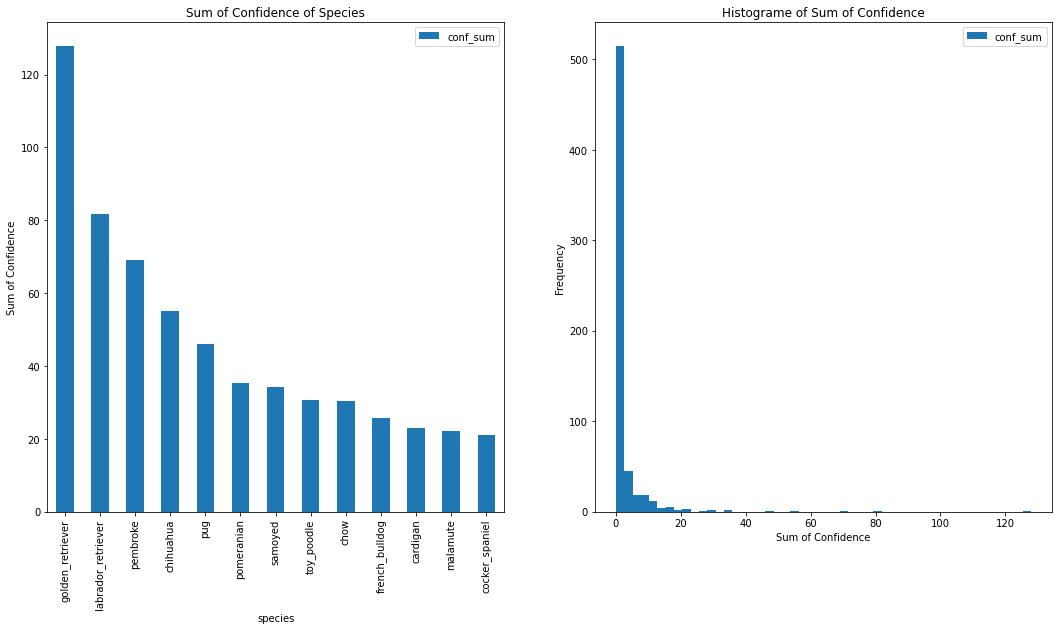

In [87]:
fig, ax = plt.subplots(1, 2, figsize = (18,9))
df_dogs[df_dogs['conf_sum'] >= 20].plot(kind = 'bar', x = 'species', y = 'conf_sum', ax = ax[0])
df_dogs.plot(kind = 'hist', x = 'species', y = 'conf_sum', ax = ax[1], bins = 50)
ax[0].set_ylabel('Sum of Confidence')
ax[1].set_xlabel('Sum of Confidence')

ax[0].set_title("Sum of Confidence of Species")
ax[1].set_title("Histograme of Sum of Confidence")
plt.savefig("dog_species.jpg")

In [90]:
df_dogs[df_dogs['conf_sum'] >= 1].shape[0], df_dogs.shape[0], df_dogs[df_dogs['conf_sum'] >= 1].shape[0]/df_dogs.shape[0]

(211, 632, 0.3338607594936709)

* `p1_conf`, `p2_conf`, and `p3_conf` can be considered as the number of dog types that appear in the image.
* The sum of confidence for each species can be viewed as an expected value for the number of species present in the overall image.

Let's find out the number of `favorite` and `retweet` by dog type

In [60]:
df_dogs['average_favorite'] = df_dogs['favorite_count'] / df_dogs['conf_sum']
df_dogs['average_retweet'] = df_dogs['retweet_count'] / df_dogs['conf_sum']

In [61]:
df_dogs2 = df_dogs[df_dogs['conf_sum'] >= 20].copy()
print(df_dogs2.shape)
df_dogs2.head()

(13, 6)


,species,conf_sum,favorite_count,retweet_count,average_favorite,average_retweet
0,golden_retriever,127.900124,1.282084e+06,420655.301360,10024.104536,3288.935837
1,labrador_retriever,81.613169,8.970266e+05,308544.480587,10991.199377,3780.572219
2,pembroke,69.170377,7.600279e+05,209117.595893,10987.765073,3023.224732
3,chihuahua,55.127765,4.048465e+05,132414.583716,7343.785732,2401.958121
4,pug,46.061516,2.202319e+05,71279.636781,4781.255879,1547.487866


In [62]:
df_dogs2[df_dogs2['average_favorite'] == df_dogs2['average_favorite'].max()]

,species,conf_sum,favorite_count,retweet_count,average_favorite,average_retweet
9,french_bulldog,25.682713,383527.443758,93686.213548,14933.291672,3647.831662


In [63]:
df_dogs2[df_dogs2['average_retweet'] == df_dogs2['average_retweet'].max()]

,species,conf_sum,favorite_count,retweet_count,average_favorite,average_retweet
6,samoyed,34.25736,374765.901016,138528.406633,10939.71942,4043.756105


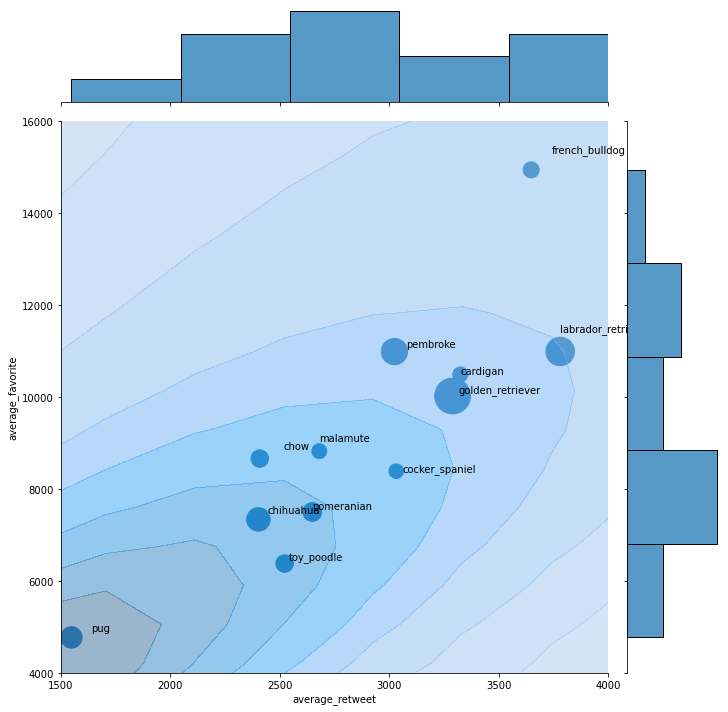

In [92]:
cmap = sns.color_palette("Set2")
grid = sns.jointplot(x = 'average_retweet', y = 'average_favorite', data = df_dogs2, height = 10, cmap = cmap)
grid.ax_joint.scatter(df_dogs2['average_retweet'], df_dogs2['average_favorite'],
           s = df_dogs2['conf_sum'] * 10)


for i in range(df_dogs2.shape[0]):
    temp = df_dogs2.iloc[i]
    r = np.random.rand() * 0.03
    s1 = (np.random.rand() > 0.5) + (np.random.rand() < 0.5)
    s2 = (np.random.rand() > 0.5) + (np.random.rand() < 0.5)
    grid.ax_joint.text(temp['average_retweet'] + (s1*r * temp['average_retweet'])
                       , temp['average_favorite'] + (s2*r * temp['average_favorite']), 
                       temp['species'])

sns.kdeplot(x = 'retweet_count', y = 'favorite_count', data = df,
            shade = True, alpha = 0.5, palette = cmap, 
            ax = grid.ax_joint)

grid.ax_joint.set_xlim(1500, 4000)
grid.ax_joint.set_ylim(4000, 16000)
plt.show()

grid.savefig("retweet-favorite.jpg")

* People's favorite tweet is `french bulldog`.
* The tweet that people retweet the most is `samoyed`.
* The dog with the most original tweets is the `golden retriever`.